In [91]:
####################### normal classification #######################
#####################################################################

In [100]:
import pandas as pd
import numpy as np

# Carregar o arquivo CSV
df = pd.read_csv("Training_Features.csv")

# Converter colunas preditoras para um array NumPy
features = df[['B2', 'B3', 'B4', 'NDVI']].values
#features = df[['B2', 'B8']].values

#features = df[['NDVI_1','NDVI_2','NDVI_3','NDVI_4','NDVI_5','NDVI_6']].values

# Converter a coluna 'classe' para um array NumPy
labels = df['classe'].values

In [101]:
df.head(3)

,system:index,B2,B3,B4,B8,NDVI,classe,.geo
0,1_0_0,0.05900,0.08375,0.1058,0.2794,0.439862,1,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,1_1_0,0.04470,0.07080,0.0822,0.2740,0.480167,1,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,1_2_0,0.04345,0.07830,0.0780,0.2837,0.522777,1,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [103]:
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)

In [97]:
#################################################

In [92]:
import pandas as pd

# Lê o arquivo CSV com as features para predição
df = pd.read_csv("Prediction_Features.csv")


In [94]:

# Seleciona as colunas que serão usadas como entrada para o modelo
input_features = df[['B2', 'B3', 'B4', 'NDVI']]	



In [96]:
input_features = df[['B2', 'B3', 'B4', 'NDVI']]


In [ ]:
# Realiza a predição com o modelo treinado
predictions_svc = svc.predict(input_features)

# Adiciona a coluna de predição ao DataFrame
df['prediction'] = predictions_svc

# Salva o DataFrame com as predições em um novo arquivo CSV
df.to_csv("Prediction_Features_with_predictions_v3.csv", index=False)

In [ ]:
#####################

In [106]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



2025-03-05 16:17:50.029183: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-05 16:17:50.132706: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-05 16:17:50.216822: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741202270.295372  675975 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741202270.316802  675975 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-05 16:17:50.484065: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [110]:
# --- Treinamento do Modelo ---

# Carregar o arquivo de treinamento
train_df = pd.read_csv("Training_Features.csv")

# Selecionar as features e os rótulos
X_train = train_df[['B2', 'B3', 'B4', 'NDVI']].values
y_train = train_df['classe'].values

# Converter os rótulos de {1,2} para {0,1} para o treinamento
y_train = y_train - 1

# Normalizar os dados com MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)



In [111]:
# Criar o modelo da rede neural
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 classes

# Compilar o modelo
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)



Epoch 1/50


/home/s299259068/Área de Trabalho/Projetos/quantum/qiskit_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5021 - loss: 0.6645  
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4825 - loss: 0.6179 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8942 - loss: 0.5569 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9949 - loss: 0.4966 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.4431 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.3961 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.3443 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.2889 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.2531 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.2196 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.1780 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.1520 
Epoch 13/50

In [112]:
# --- Predição com o Modelo Treinado ---

# Carregar o arquivo com features para predição
pred_df = pd.read_csv("Prediction_Features.csv")

# Extrair e normalizar as features usando o mesmo scaler
X_pred = pred_df[['B2', 'B3', 'B4', 'NDVI']].values
X_pred = scaler.transform(X_pred)

# Gerar as predições (as probabilidades)
pred_probs = model.predict(X_pred)

# Converter as probabilidades em classes preditas:
# np.argmax retorna 0 ou 1 e somamos 1 para voltar aos valores originais (1 e 2)
pred_classes = np.argmax(pred_probs, axis=1) + 1

# Adicionar a coluna de predições ao DataFrame
pred_df['prediction'] = pred_classes

# Salvar o novo arquivo CSV com as predições
pred_df.to_csv("Prediction_Features_with_predictions.csv", index=False)


138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [ ]:
################################################################ 
##### comparaçao modelo normal e simulador quantico ############
################################################################

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.warp import reproject, Resampling




Resultados para RasterPredictions_final_nn.tif:
Predição = 1:
  Mapbiomas == 39: 1910 (92.23%)
  Mapbiomas != 39: 161 (7.77%)
Predição = 2:
  Mapbiomas == 3: 2215 (94.70%)
  Mapbiomas != 3: 124 (5.30%)

Resultados para RasterPredictions_final_v4.tif:
Predição = 1:
  Mapbiomas == 39: 1769 (76.58%)
  Mapbiomas != 39: 541 (23.42%)
Predição = 2:
  Mapbiomas == 3: 1839 (87.57%)
  Mapbiomas != 3: 261 (12.43%)


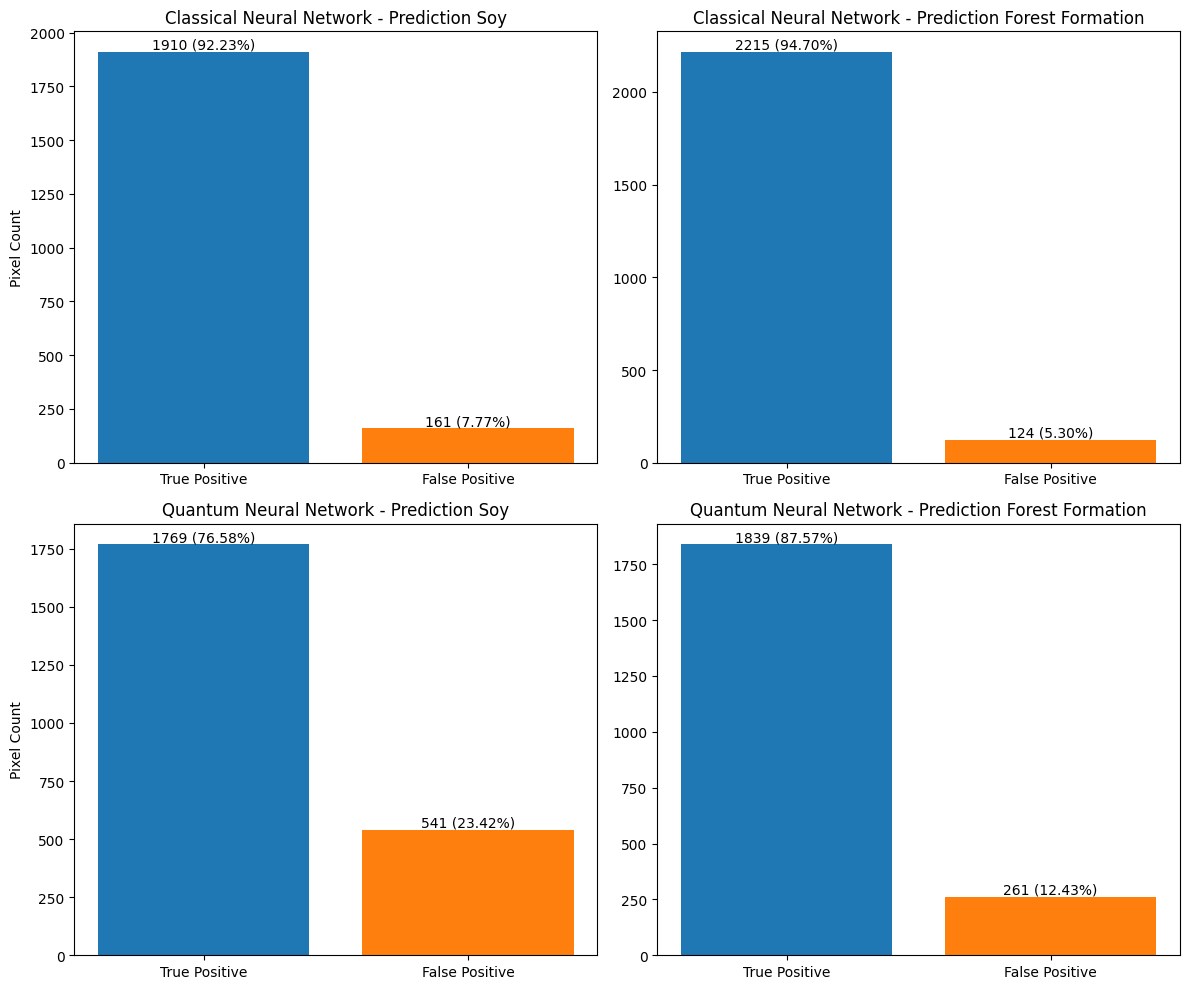

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.warp import reproject, Resampling

def reproject_mapbiomas(mapbiomas_path, target_profile):
    """
    Lê a única banda do raster Mapbiomas e reamostra para a grade definida em target_profile.
    """
    with rasterio.open(mapbiomas_path) as src:
        data = src.read(1)  # Lê a única banda (contendo valores 39 ou 3)
        dest = np.empty((target_profile['height'], target_profile['width']), dtype=data.dtype)
        reproject(
            source=data,
            destination=dest,
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=target_profile['transform'],
            dst_crs=target_profile['crs'],
            resampling=Resampling.nearest  # vizinho mais próximo para preservar classes
        )
    return dest

def autolabel(ax, bars, labels):
    """Adiciona os rótulos (contagem e percentual) acima das barras."""
    for bar, label in zip(bars, labels):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height,
                label, ha='center', va='bottom')

def main():
    # Caminhos dos arquivos
    mapbiomas_path = "Mapbiomas_RS_area_estudo.tif"
    pred_nn_path = "RasterPredictions_final_nn.tif"
    pred_v4_path = "RasterPredictions_final_v4.tif"
    
    # Abre o arquivo de previsão (nn) para extrair o perfil alvo
    with rasterio.open(pred_nn_path) as pred_nn:
        target_profile = pred_nn.profile  # contém transform, crs, height, width, etc.
        pred_nn_data = pred_nn.read(1)  # Valores 1 ou 2
    
    # Abre o arquivo de previsão (v4)
    with rasterio.open(pred_v4_path) as pred_v4:
        pred_v4_data = pred_v4.read(1)
    
    # Reprojeta o Mapbiomas para a grade dos arquivos de previsão
    mapbiomas_data = reproject_mapbiomas(mapbiomas_path, target_profile)
    
    # === Cálculos para RasterPredictions_final_nn.tif ===
    # Predição = 1
    mask_nn_1 = (pred_nn_data == 1)
    total_nn_1 = np.sum(mask_nn_1)
    count_nn_1_map39 = np.sum((mapbiomas_data == 39) & mask_nn_1)
    count_nn_1_not39 = np.sum((mapbiomas_data != 39) & mask_nn_1)
    
    perc_nn_1_map39 = 100 * count_nn_1_map39 / total_nn_1 if total_nn_1 > 0 else 0
    perc_nn_1_not39 = 100 * count_nn_1_not39 / total_nn_1 if total_nn_1 > 0 else 0
    
    # Predição = 2
    mask_nn_2 = (pred_nn_data == 2)
    total_nn_2 = np.sum(mask_nn_2)
    count_nn_2_map3 = np.sum((mapbiomas_data == 3) & mask_nn_2)
    count_nn_2_not3 = np.sum((mapbiomas_data != 3) & mask_nn_2)
    perc_nn_2_map3 = 100 * count_nn_2_map3 / total_nn_2 if total_nn_2 > 0 else 0
    perc_nn_2_not3 = 100 * count_nn_2_not3 / total_nn_2 if total_nn_2 > 0 else 0
    
    # === Cálculos para RasterPredictions_final_v4.tif ===
    # Predição = 1
    mask_v4_1 = (pred_v4_data == 1)
    total_v4_1 = np.sum(mask_v4_1)
    count_v4_1_map39 = np.sum((mapbiomas_data == 39) & mask_v4_1)
    count_v4_1_not39 = np.sum((mapbiomas_data != 39) & mask_v4_1)
    
    perc_v4_1_map39 = 100 * count_v4_1_map39 / total_v4_1 if total_v4_1 > 0 else 0
    perc_v4_1_not39 = 100 * count_v4_1_not39 / total_v4_1 if total_v4_1 > 0 else 0
    
    # Predição = 2
    mask_v4_2 = (pred_v4_data == 2)
    total_v4_2 = np.sum(mask_v4_2)
    count_v4_2_map3 = np.sum((mapbiomas_data == 3) & mask_v4_2)
    count_v4_2_not3 = np.sum((mapbiomas_data != 3) & mask_v4_2)
    perc_v4_2_map3 = 100 * count_v4_2_map3 / total_v4_2 if total_v4_2 > 0 else 0
    perc_v4_2_not3 = 100 * count_v4_2_not3 / total_v4_2 if total_v4_2 > 0 else 0
    
    # === Exibe os resultados no console ===
    print("Resultados para RasterPredictions_final_nn.tif:")
    print("Predição = 1:")
    print(f"  Mapbiomas == 39: {count_nn_1_map39} ({perc_nn_1_map39:.2f}%)")
    print(f"  Mapbiomas != 39: {count_nn_1_not39} ({perc_nn_1_not39:.2f}%)")
    print("Predição = 2:")
    print(f"  Mapbiomas == 3: {count_nn_2_map3} ({perc_nn_2_map3:.2f}%)")
    print(f"  Mapbiomas != 3: {count_nn_2_not3} ({perc_nn_2_not3:.2f}%)\n")
    
    print("Resultados para RasterPredictions_final_v4.tif:")
    print("Predição = 1:")
    print(f"  Mapbiomas == 39: {count_v4_1_map39} ({perc_v4_1_map39:.2f}%)")
    print(f"  Mapbiomas != 39: {count_v4_1_not39} ({perc_v4_1_not39:.2f}%)")
    print("Predição = 2:")
    print(f"  Mapbiomas == 3: {count_v4_2_map3} ({perc_v4_2_map3:.2f}%)")
    print(f"  Mapbiomas != 3: {count_v4_2_not3} ({perc_v4_2_not3:.2f}%)")
    
    # === Gera gráficos para visualização ===
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # RasterPredictions_final_nn.tif - Predição 1
    colors_nn_1 = ['tab:blue', 'tab:orange']
    bars = axes[0, 0].bar(['True Positive', 'False Positive'],
                          [count_nn_1_map39, count_nn_1_not39],
                          color=colors_nn_1)
    axes[0, 0].set_title('Classical Neural Network - Prediction Soy')
    axes[0, 0].set_ylabel('Pixel Count')
    labels_nn_1 = [f"{count_nn_1_map39} ({perc_nn_1_map39:.2f}%)", f"{count_nn_1_not39} ({perc_nn_1_not39:.2f}%)"]
    autolabel(axes[0, 0], bars, labels_nn_1)
    
    # RasterPredictions_final_nn.tif - Predição 2
    colors_nn_2 = ['tab:blue', 'tab:orange']
    bars = axes[0, 1].bar(['True Positive', 'False Positive'],
                          [count_nn_2_map3, count_nn_2_not3],
                          color=colors_nn_2)
    axes[0, 1].set_title('Classical Neural Network - Prediction Forest Formation')
    labels_nn_2 = [f"{count_nn_2_map3} ({perc_nn_2_map3:.2f}%)", f"{count_nn_2_not3} ({perc_nn_2_not3:.2f}%)"]
    autolabel(axes[0, 1], bars, labels_nn_2)
    
    # RasterPredictions_final_v4.tif - Predição 1
    colors_v4_1 = ['tab:blue', 'tab:orange']
    bars = axes[1, 0].bar(['True Positive', 'False Positive'],
                          [count_v4_1_map39, count_v4_1_not39],
                          color=colors_v4_1)
    axes[1, 0].set_title('Quantum Neural Network - Prediction Soy')
    axes[1, 0].set_ylabel('Pixel Count')
    labels_v4_1 = [f"{count_v4_1_map39} ({perc_v4_1_map39:.2f}%)", f"{count_v4_1_not39} ({perc_v4_1_not39:.2f}%)"]
    autolabel(axes[1, 0], bars, labels_v4_1)
    
    # RasterPredictions_final_v4.tif - Predição 2
    colors_v4_2 = ['tab:blue', 'tab:orange']
    bars = axes[1, 1].bar(['True Positive', 'False Positive'],
                          [count_v4_2_map3, count_v4_2_not3],
                          color=colors_v4_2)
    axes[1, 1].set_title('Quantum Neural Network - Prediction Forest Formation')
    labels_v4_2 = [f"{count_v4_2_map3} ({perc_v4_2_map3:.2f}%)", f"{count_v4_2_not3} ({perc_v4_2_not3:.2f}%)"]
    autolabel(axes[1, 1], bars, labels_v4_2)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
